In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df= pd.read_json('modcloth_final_data.json', lines=True)
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [8]:
#nul_val= [features for features in df.columns if df[features].isnull().sum()]

#for feature in nul_val:
 #   print(feature,((df[feature].isnull().sum())*100/82790),'%')

In [9]:
missing_data=pd.DataFrame({'total missing values':df.isnull().sum(),'missing values percentage':df.isnull().sum()*100/82790,'DataType':df.dtypes})
print(missing_data)


                total missing values  missing values percentage DataType
item_id                            0                   0.000000    int64
waist                          79908                  96.518903  float64
size                               0                   0.000000    int64
quality                           68                   0.082136  float64
cup size                        6255                   7.555260   object
hips                           26726                  32.281677  float64
bra size                        6018                   7.268994  float64
category                           0                   0.000000   object
bust                           70936                  85.681846   object
height                          1107                   1.337118   object
user_name                          0                   0.000000   object
length                            35                   0.042276   object
fit                                0               

In [10]:
num_features=[features for features in df.columns if df[features].dtype!='O' ]
str_features=[features for features in df.columns if df[features].dtype=='O']


In [11]:
print('Numerical features are ',(len(num_features)),' while string features are ',(len(str_features)))

Numerical features are  8  while string features are  10


In [21]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [13]:
df['size'].value_counts(ascending=True)

25        1
31        1
0        31
33       46
30       65
27       94
2        94
24      125
3       142
21      201
17      235
18      251
14      364
13      486
11      542
9       737
6       775
7       777
5       851
10     1164
38     1461
1      1784
32     3613
26     5656
15     6883
20     7292
4     13883
12    17343
8     17893
Name: size, dtype: int64

In [14]:
num_features

['item_id',
 'waist',
 'size',
 'quality',
 'hips',
 'bra size',
 'user_id',
 'shoe size']

In [15]:
Num_fea_select=[
 'waist',
 'size',
 'quality',
 'hips',
 'bra size',
 'shoe size']

<Axes: >

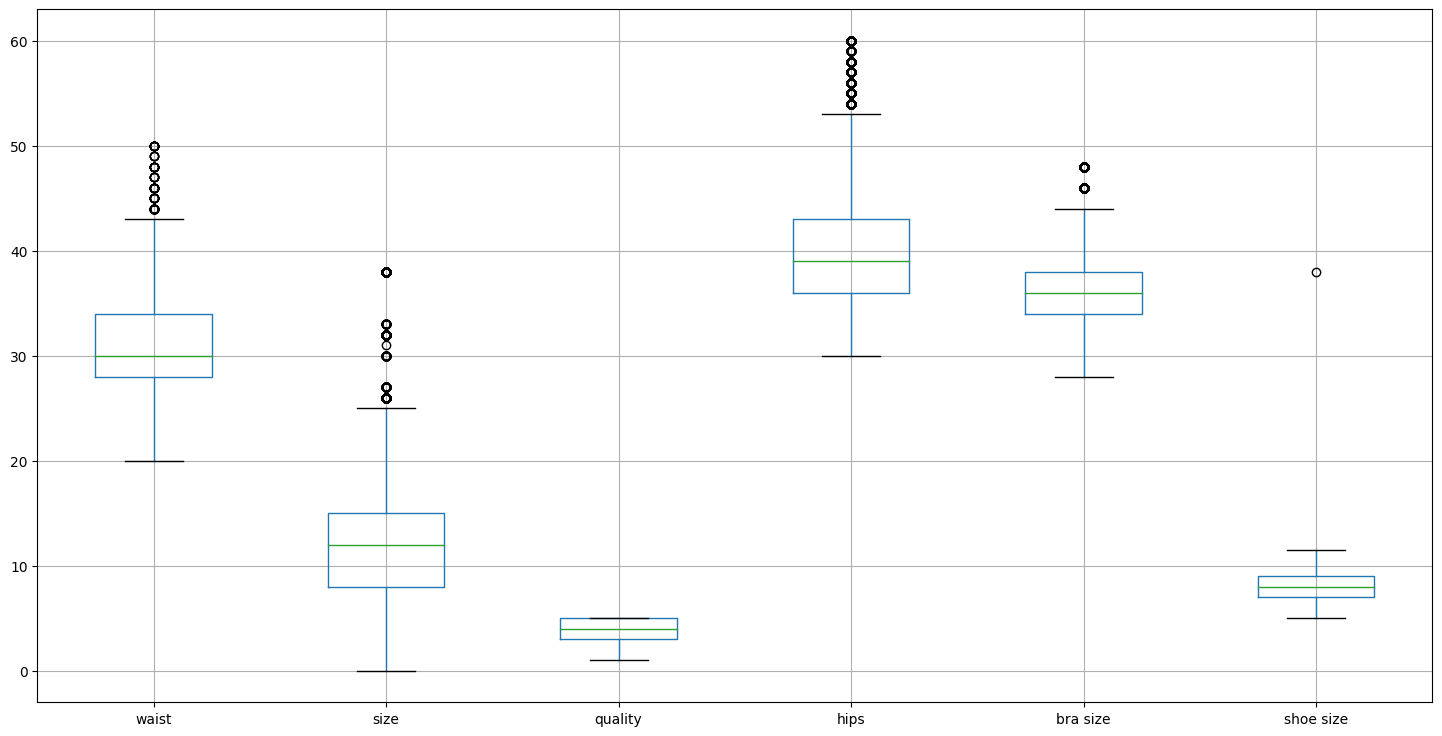

In [16]:
plt.figure(figsize=(18,9))
df[Num_fea_select].boxplot()


TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

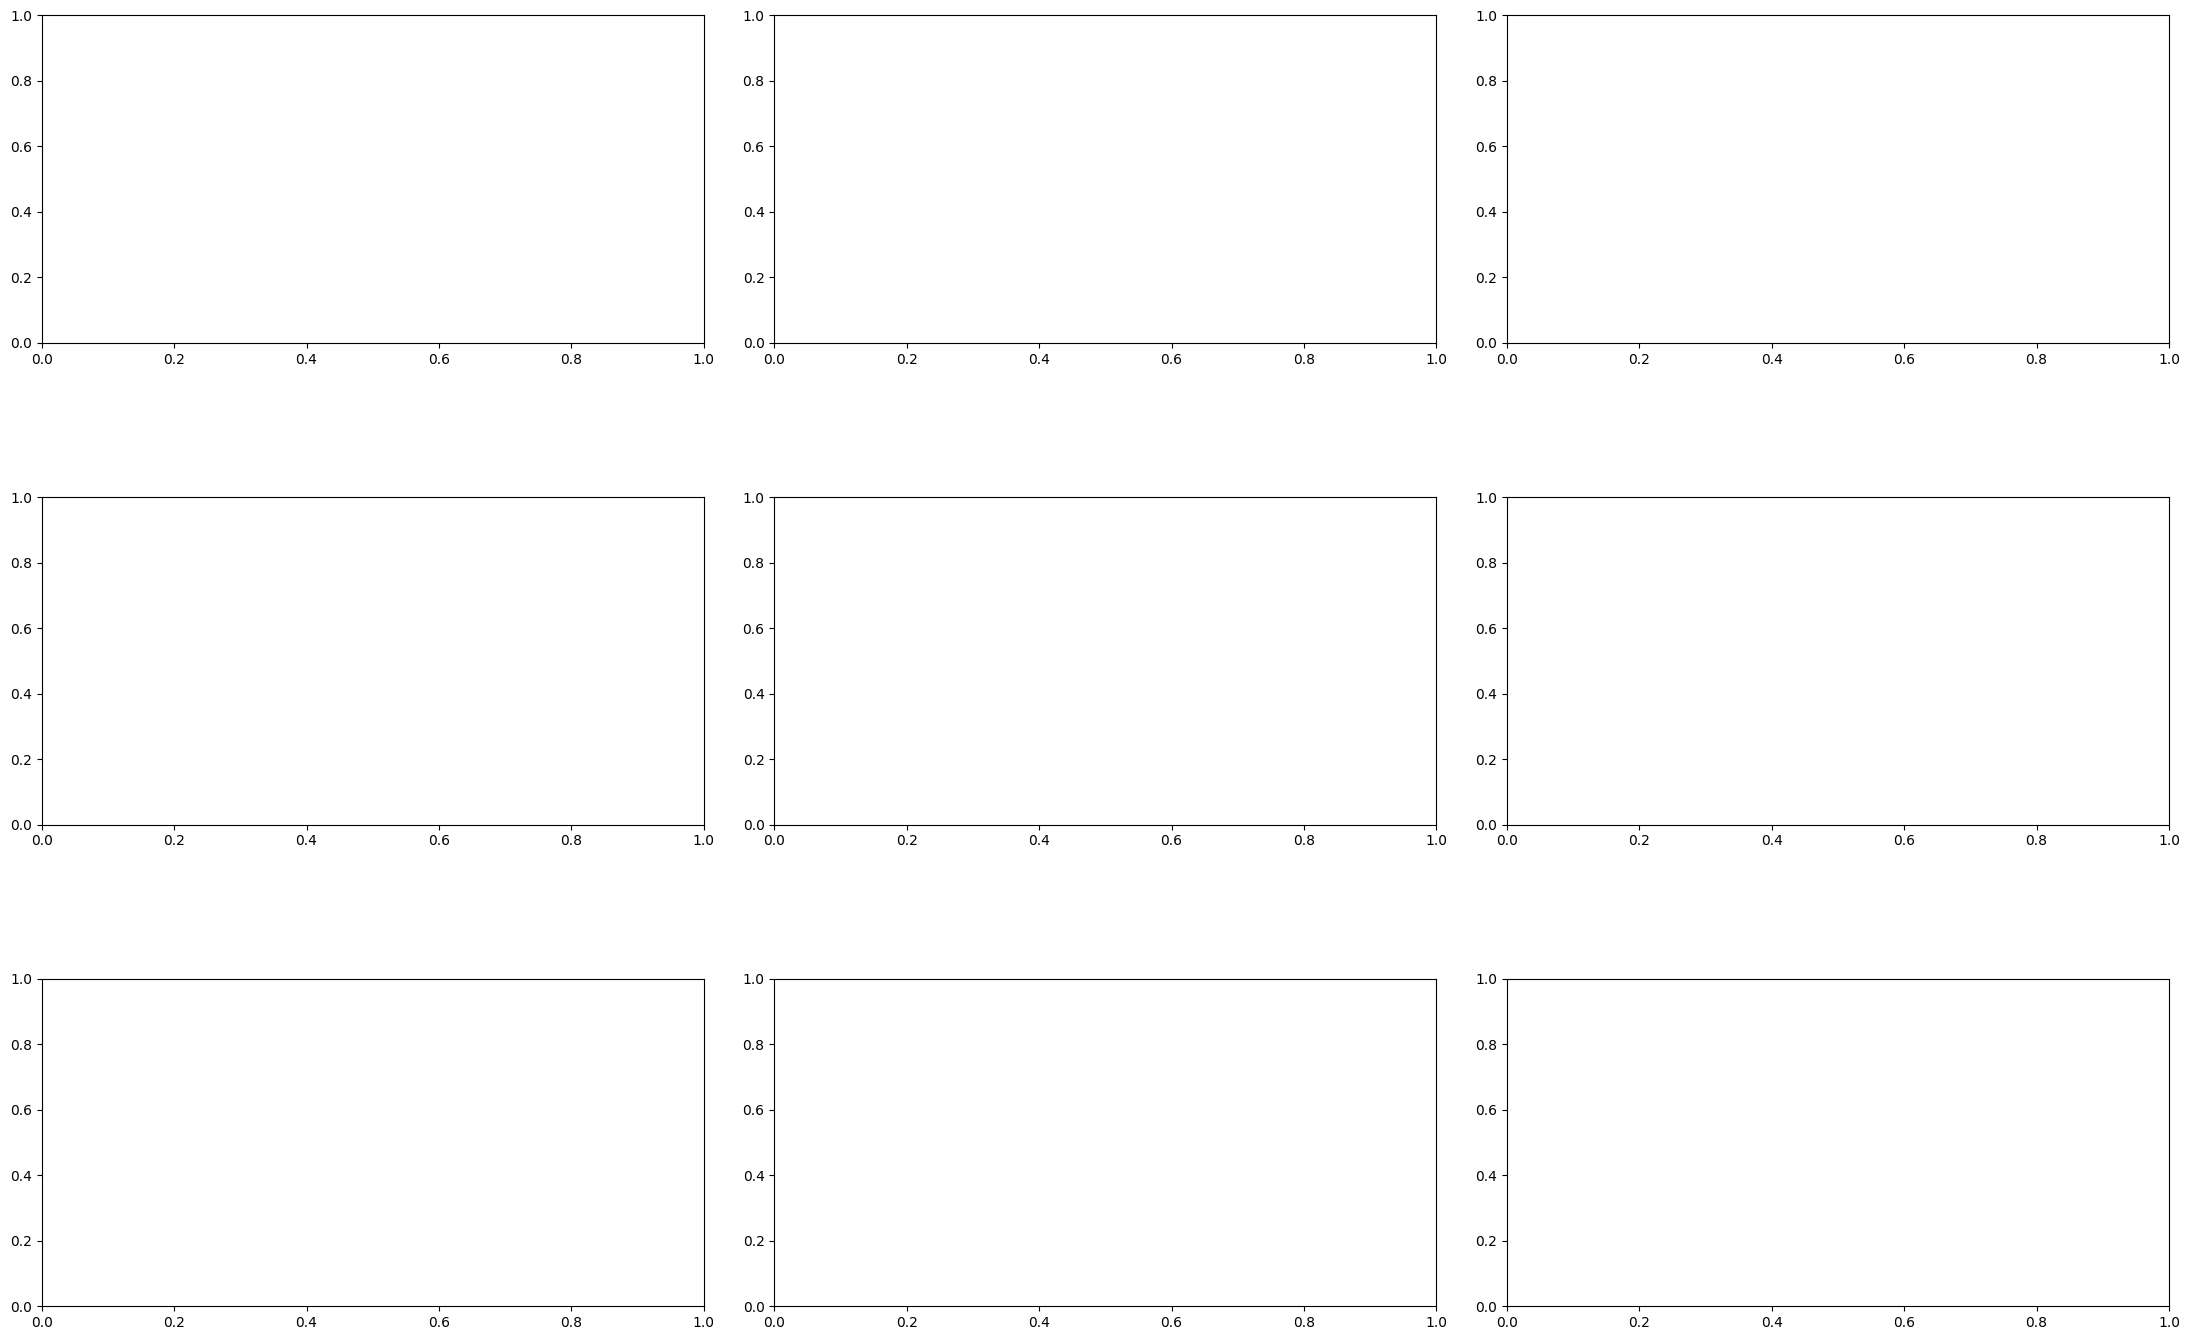

In [28]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot('bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra size','bust', 'category', 'cup size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1